# Red Wine Quality Prediction Project

Project Description:

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model. 
Inspiration
Use machine learning to determine which physiochemical properties make a wine 'good'!


In [29]:
#importing necessary libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [31]:
#Downloading the raw data and loading into dataframe with the help of pandas library:
df=pd.read_csv(r"C:\Users\sesur\Downloads\winequality-red.csv")


                                  1)EXPLORING THE DATASET

In [32]:
#For viewing the first 5 columns in given dataset
df.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [33]:
#To know about the no of rows and columns in the dataset
df.shape

(1599, 12)

There are 1599 rows and 12 columns in the given dataset.

In [34]:
#To know more about the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


From this we can say that all the columns has numerical data.
Independent features are: fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol.
Dependent features are: quality

In [35]:
#To know more about the quality column:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

From this we can say that the quality column has 6 categories :3,4,5,6,7,8 .So we can say that this is a multi-level classification problem.

                                   2)ANALYSING THE DATASET 

In [36]:
#1)Identifying if there is any missing values in the dataset.
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

This data has no missing values we can further proceed the data for further analysing.

In [37]:
#2)To understand the statistics of the dataset:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Observations:
1)The count of all the columns are equal.

2)The mean values of columns fixed capacity,total sulfur dioxide can have unsymmentric distribution,outliers and skewness.

3)we can also see how much data been dispersed with the help of standard deviation.

4)There is huge difference between 75th quartile and maximum values in the columns: residual sugar,free sulfur dioxide,total sulphur dioxide.
   From this we can have idea about the descriptive statistics of the data.we can further see them with help of visualization. 

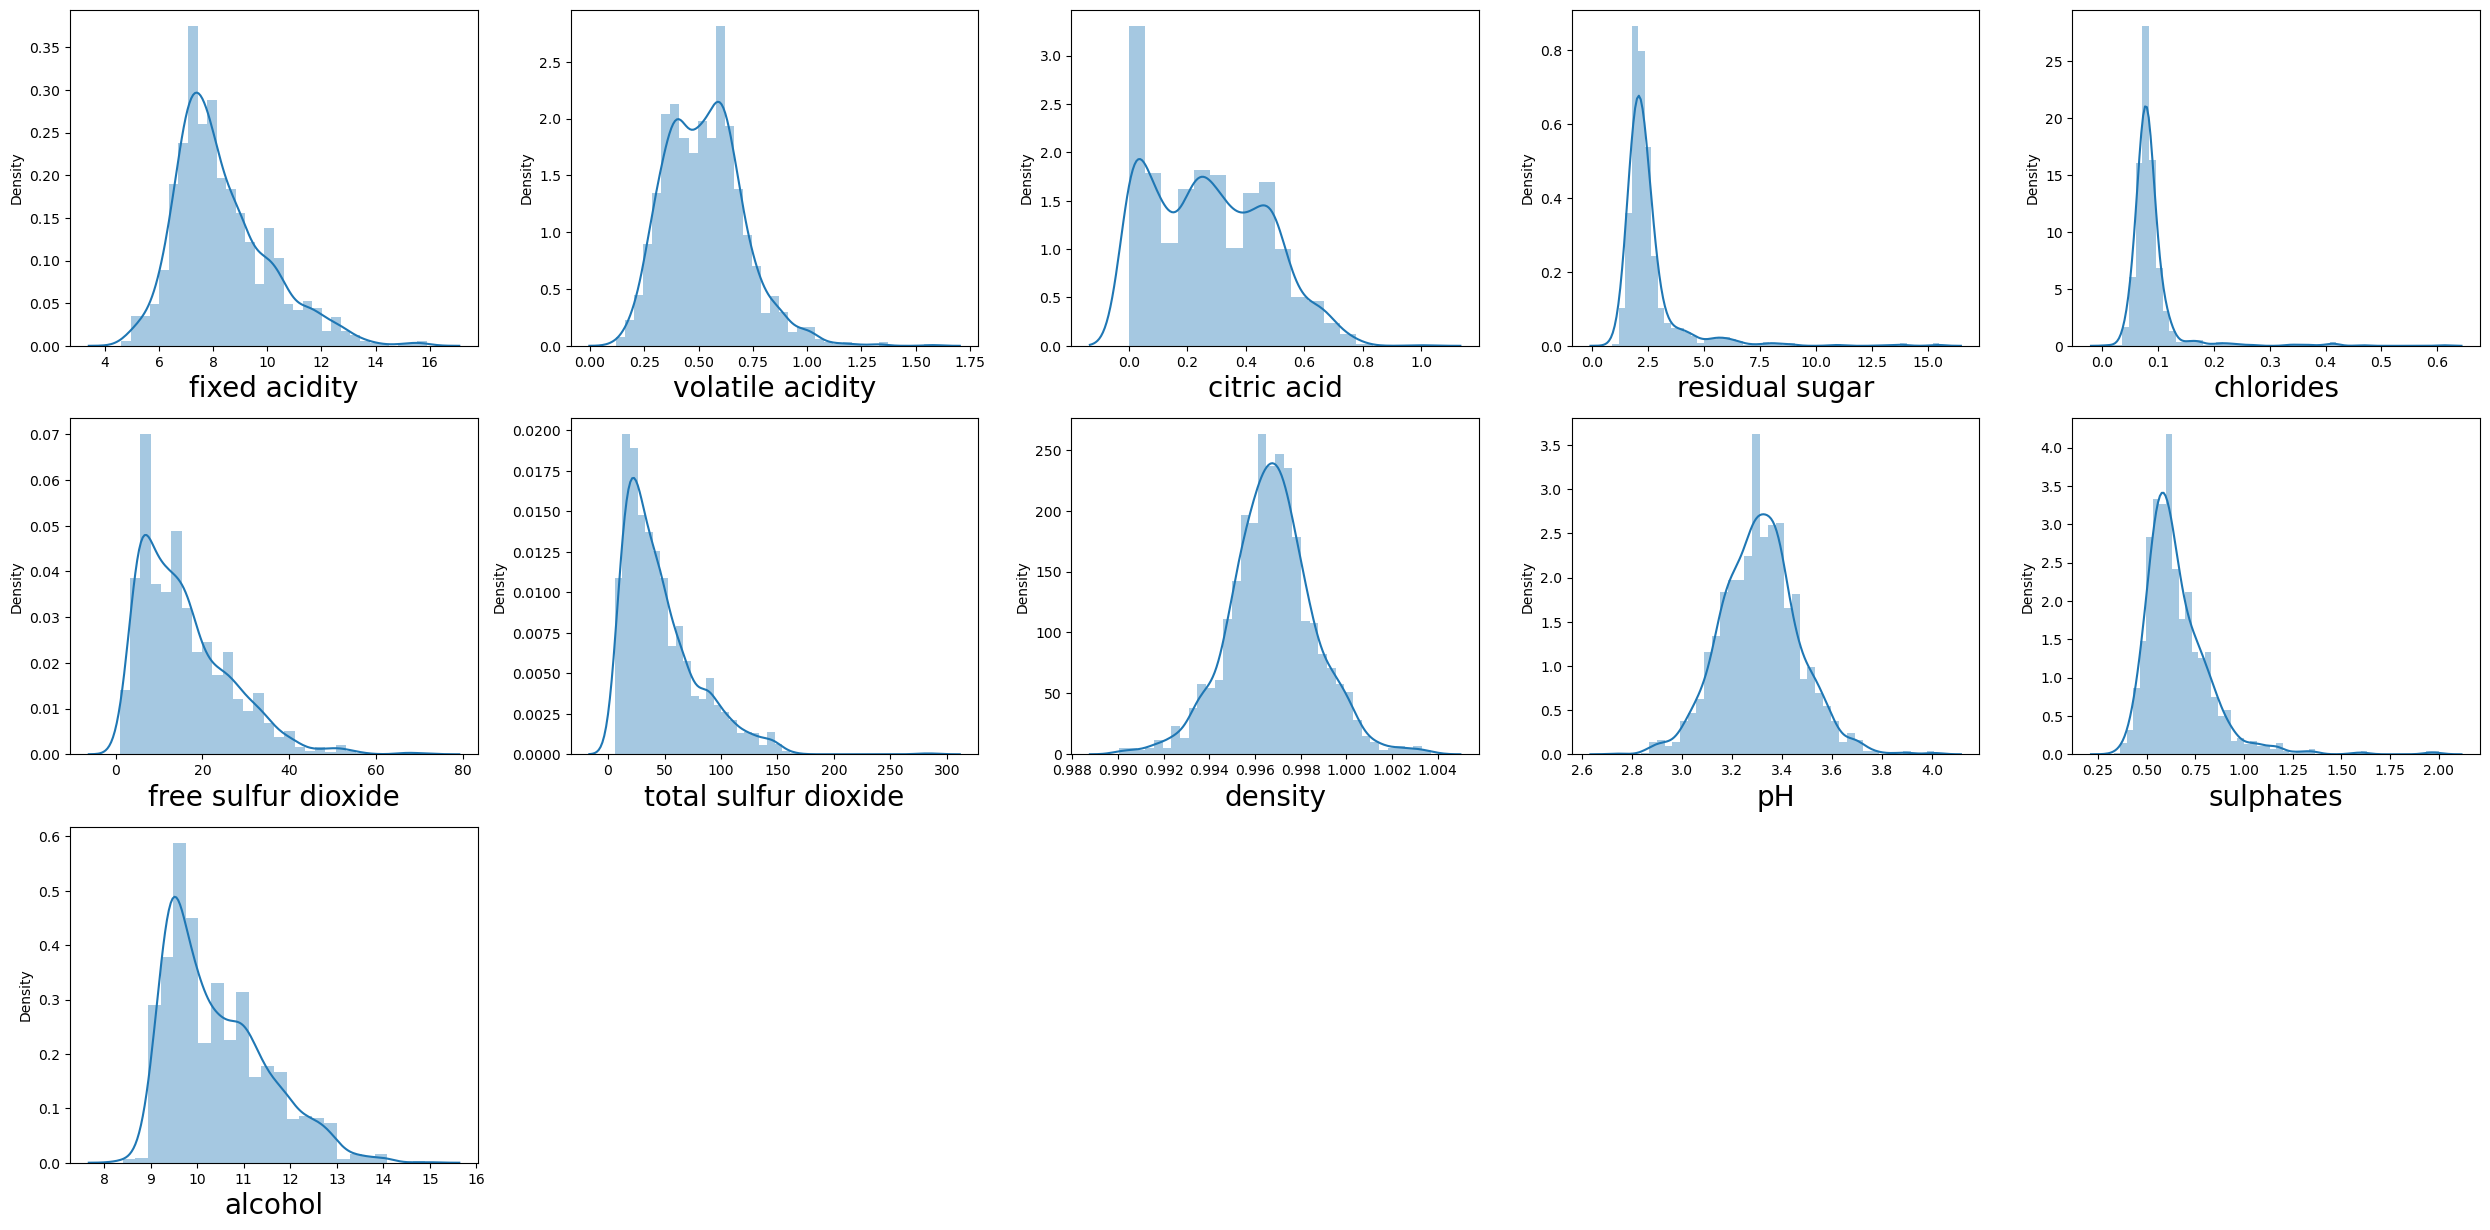

In [17]:
#To know about the distribution 
plt.figure(figsize=(25,20))
plotnumber=1
for column in df:
    if plotnumber<=11:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

from the above visualisation we can find that the there are only few columns which has symmentric/normal distribution others have some skewnessnpresent in them.
[density,pH,sulphates,fixed acidity]:These columns some what has the normal distribution curve.
[chlorides,residual sugar]:These columns also has the curve but the dispersion of the data is narrow.
[free sulfur dioxide,total sulfur dioxide,alchol,volatile acidity,citric acid]:these columns has skewness in the data

<function matplotlib.pyplot.show(close=None, block=None)>

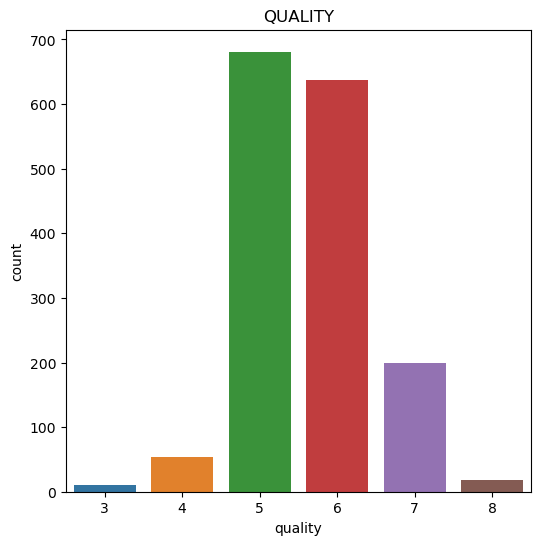

In [18]:
#to Show the counts of observations in each categorical bin using bars.
plt.figure(figsize=(6,6))
sns.countplot(x="quality",data=df)
plt.title("QUALITY")
plt.show

In [19]:
#to see count numerically
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

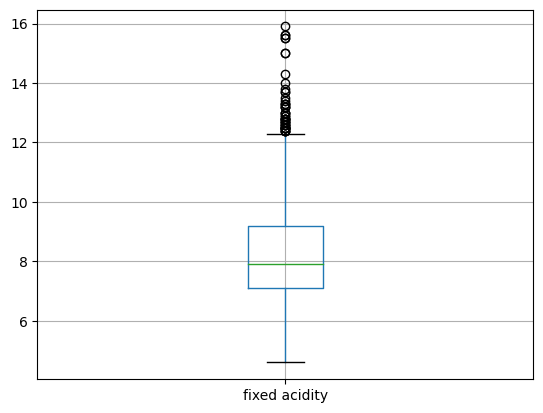

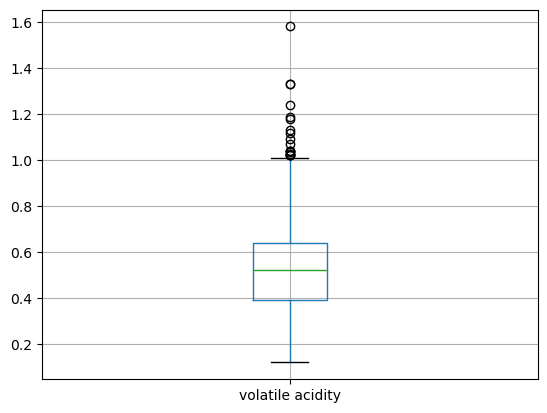

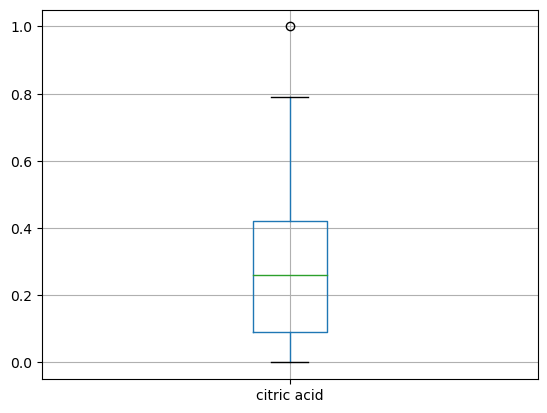

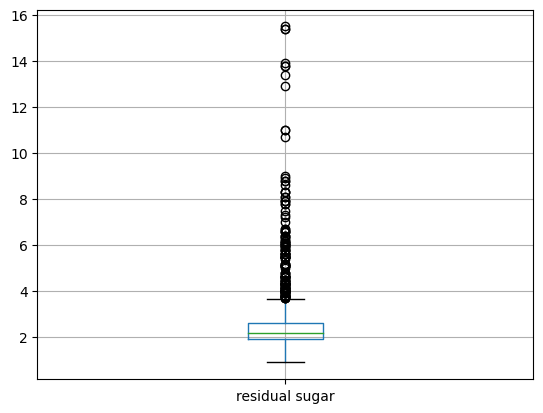

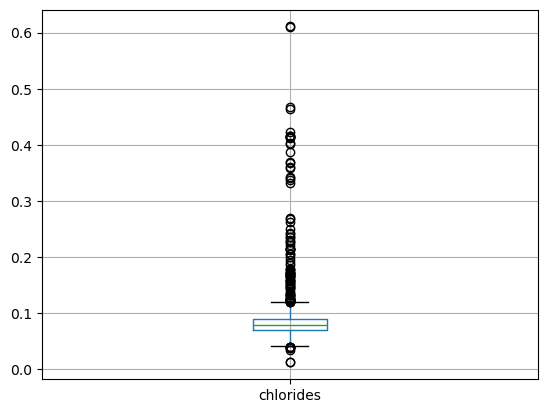

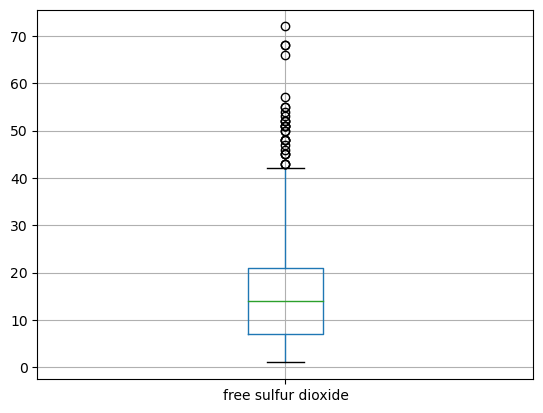

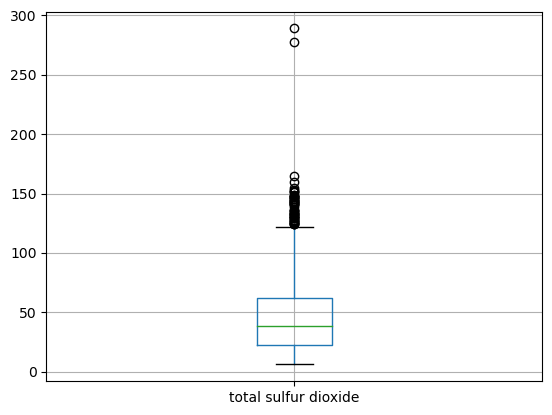

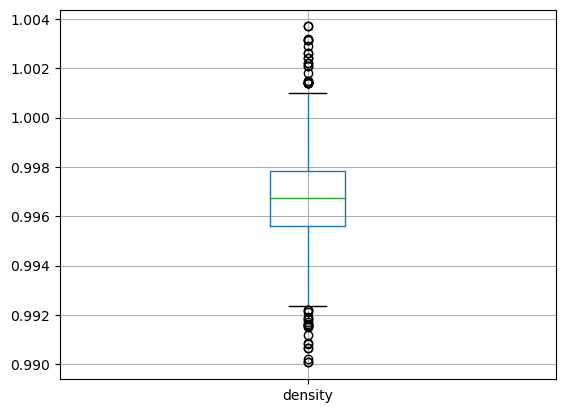

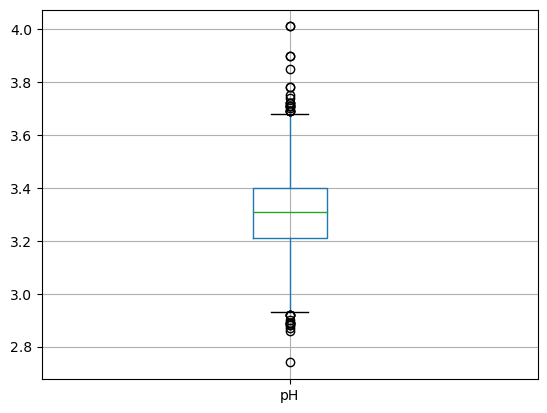

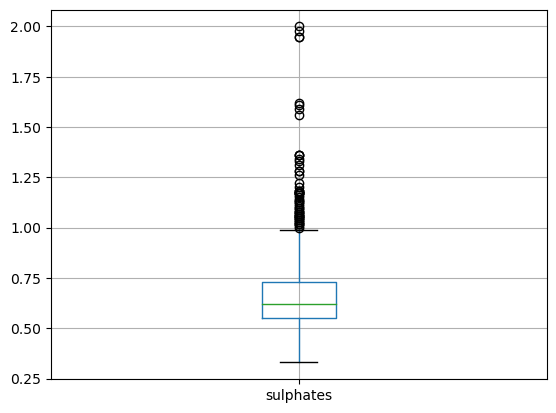

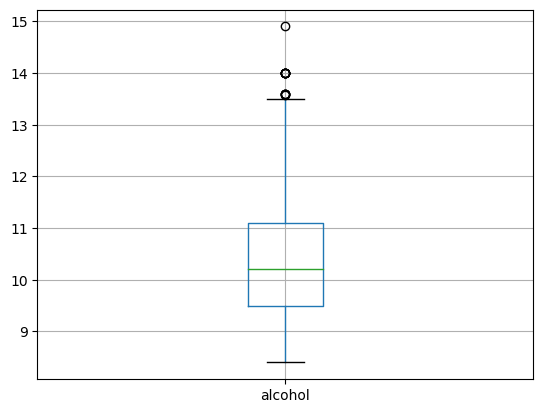

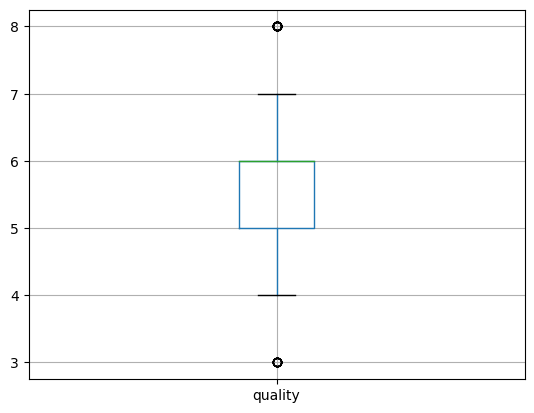

In [81]:
#to know about the outliers
for column in df:
    plt.figure()
    df.boxplot([column])

From this boxplot we can clearly say that there are outliers present in the column fixed acidity,volatile acidity,residual sugar,free sulfur dioxide,total sulphur dioxide,density,pH,sulphates.we need to handle those extreme values. 

                                 CREATING THE MODEL without treating the outlier

In [54]:
#importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

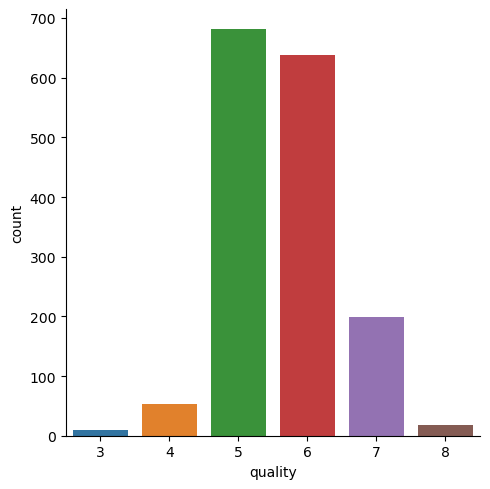

In [55]:
#Exploring the quality column
sns.catplot(x="quality",data=df,kind="count")

In [ ]:
From this we can see that there is a lot of imbalancing data in the quality column.

In [79]:
#To know more about the correlation
corr=df.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


These are columns which has negative corelation with quality :[volatile acidity,chlorides,free sulfur dioxide,total sulphur dioxide,density,pH].
These are columns which has postive corelation with quality:[fixed acidity,citric acid,residual sugar,sulphates,alchol]  
    

<Axes: xlabel='quality', ylabel='volatile acidity'>

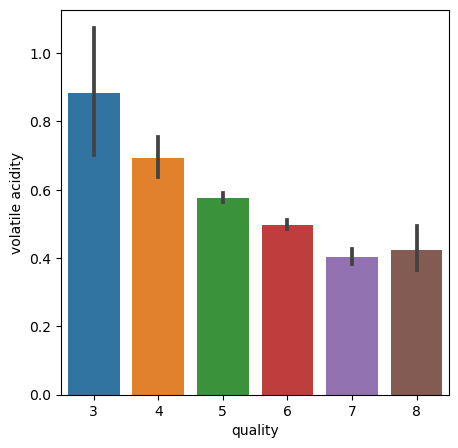

In [24]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x="quality",y="volatile acidity",data=df)
#inversely proportional [volatile vs quality]

<Axes: xlabel='quality', ylabel='citric acid'>

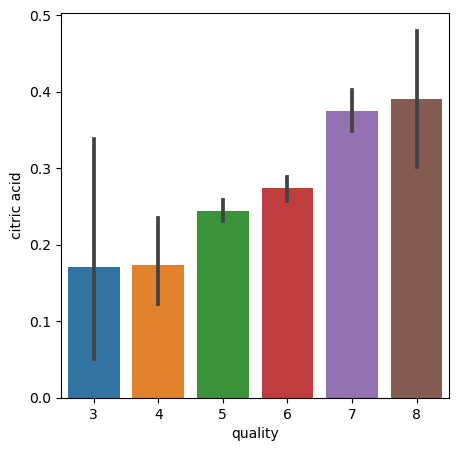

In [25]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x="quality",y="citric acid",data=df)
#directly proportional to quality citric acid

Positive corelation and negative corelation

<Axes: >

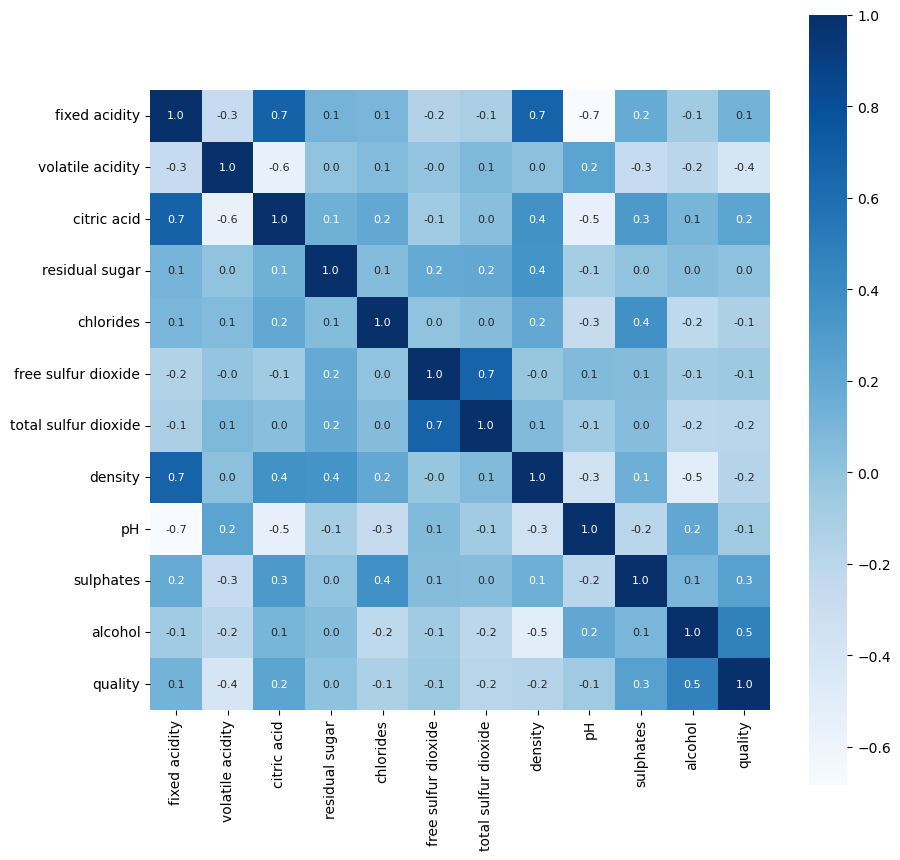

In [27]:
#heatmap:to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,square=True,fmt=".1f",annot=True,annot_kws={"size":8},cmap='Blues')


From this heatmap we can see the co-relation between the columns.

In [80]:
#Splitting the data into features and label
X=df.drop("quality",axis=1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


Label binarization : 

In [67]:
#Marking out the label:
Y=df["quality"].apply(lambda value: 1 if value>=7 else 0)#depending on the quality value Fixing up the categories into two 0:Bad quality and 1:Good Quality [when quality above 6]
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [68]:
#To split the data into train and test split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)


Random Forest classifier Assess the importance of features within the dataset. Random Forest inherently provides a feature importance score, aiding in the selection of relevant features for model training.

In [69]:
#Model-1
#training our model: RANDOM FOREST CLASSIFIER:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)


RandomForestClassifier()

In [70]:
#Testing the model with X_test
x_test_prediction=RFC.predict(x_test)


In [71]:
#Calculating the Accuracy:
accuracy=accuracy_score(x_test_prediction,y_test)

In [72]:
accuracy

0.91875

The accuracy of the model is 91.875

Building predictive system:

In [73]:
#raw data from dataset
data1=(7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4)
array=np.asarray(data1)

In [74]:
final=array.reshape(1,-1)#reshaping the numpy array

In [75]:
prediction=RFC.predict(final)#predicting the model

In [76]:
print(prediction)

[0]


In [77]:
if prediction==0:
    print("BAD QUALITY WINE")
else:
    print("GOOD QUALLITY WINE")

BAD QUALITY WINE


                            Creating the model with treating the outlier

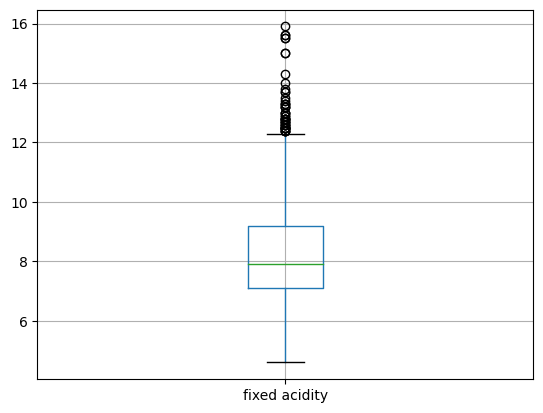

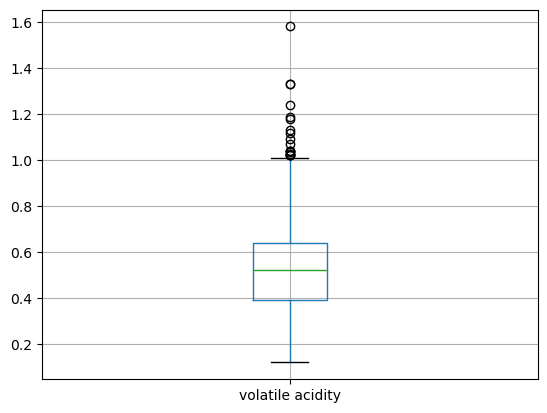

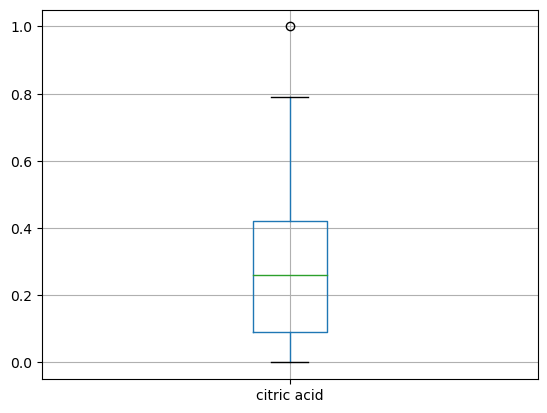

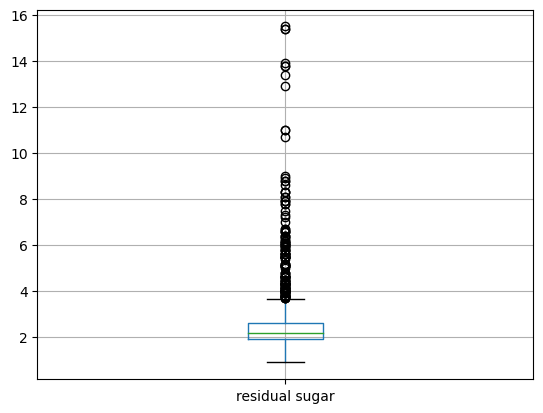

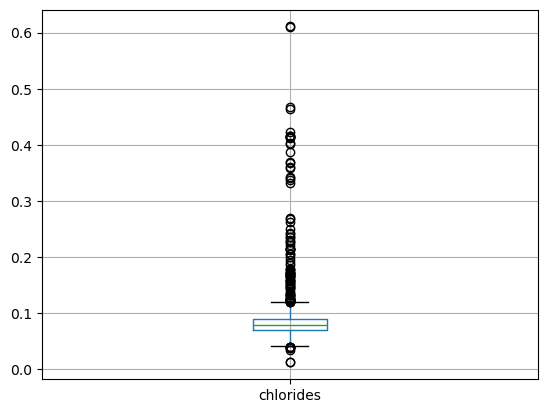

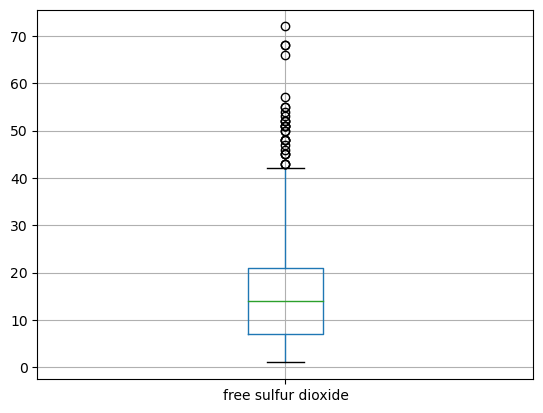

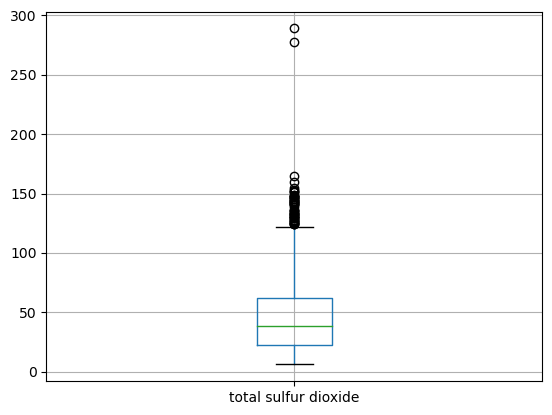

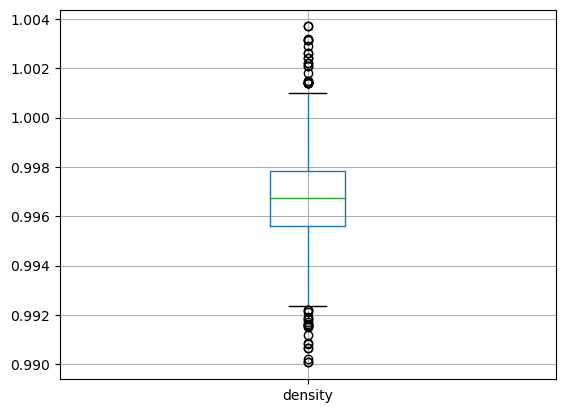

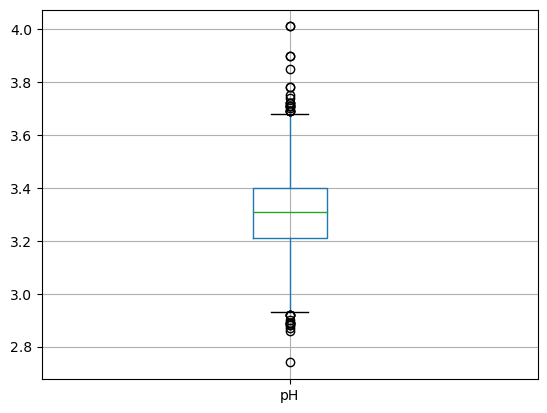

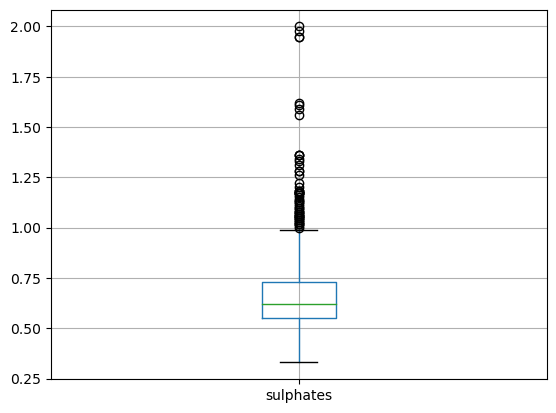

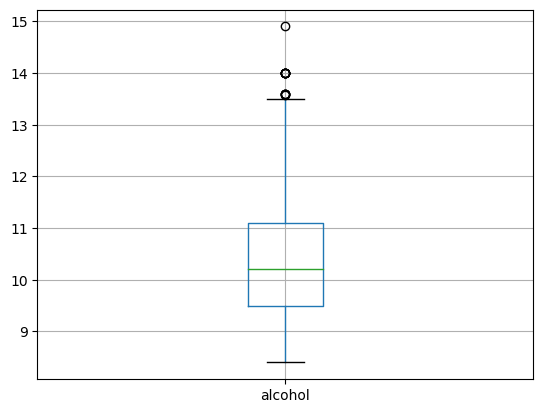

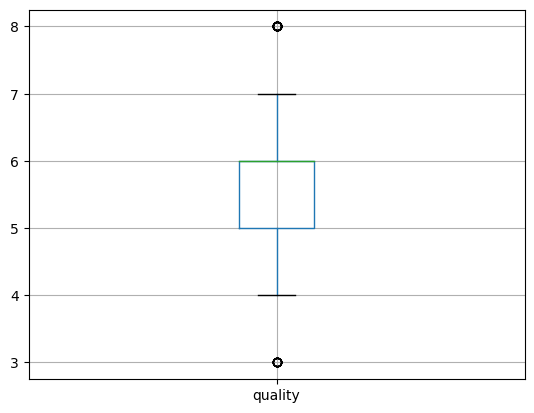

In [85]:
#to know about the outliers
for column in df:
    plt.figure()
    df.boxplot([column])

From this boxplot we can clearly say that there are outliers present in the column fixed acidity,volatile acidity,residual sugar,free sulfur dioxide,total sulphur dioxide,density,pH,sulphates.we need to handle those extreme values. 

In [86]:
from scipy.stats import zscore
#Performing the Z distribution

In [101]:
z_score=zscore(df[["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]])

In [102]:
abs_z_score=np.abs(z_score)#apply the formula and getting the scaled data

In [103]:
abs_z_score

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246
1,0.298547,1.967442,1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,0.719933,0.128950,0.584777
2,0.298547,1.297065,1.186070,0.169427,0.096353,0.083669,0.229047,0.134264,0.331177,0.048089,0.584777
3,1.654856,1.384443,1.484154,0.453218,0.264960,0.107592,0.411500,0.664277,0.979104,0.461180,0.584777
4,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.403229,0.980669,0.382271,0.053845,1.542054,0.075043,0.978765,0.899886,0.461180,0.072294
1595,1.390155,0.123905,0.877968,0.240375,0.541259,2.211469,0.137820,0.862162,1.353436,0.601055,0.729364
1596,1.160343,0.099554,0.723916,0.169427,0.243707,1.255161,0.196679,0.533554,0.705508,0.542042,0.541630
1597,1.390155,0.654620,0.775267,0.382271,0.264960,1.542054,0.075043,0.676657,1.677400,0.305990,0.209308


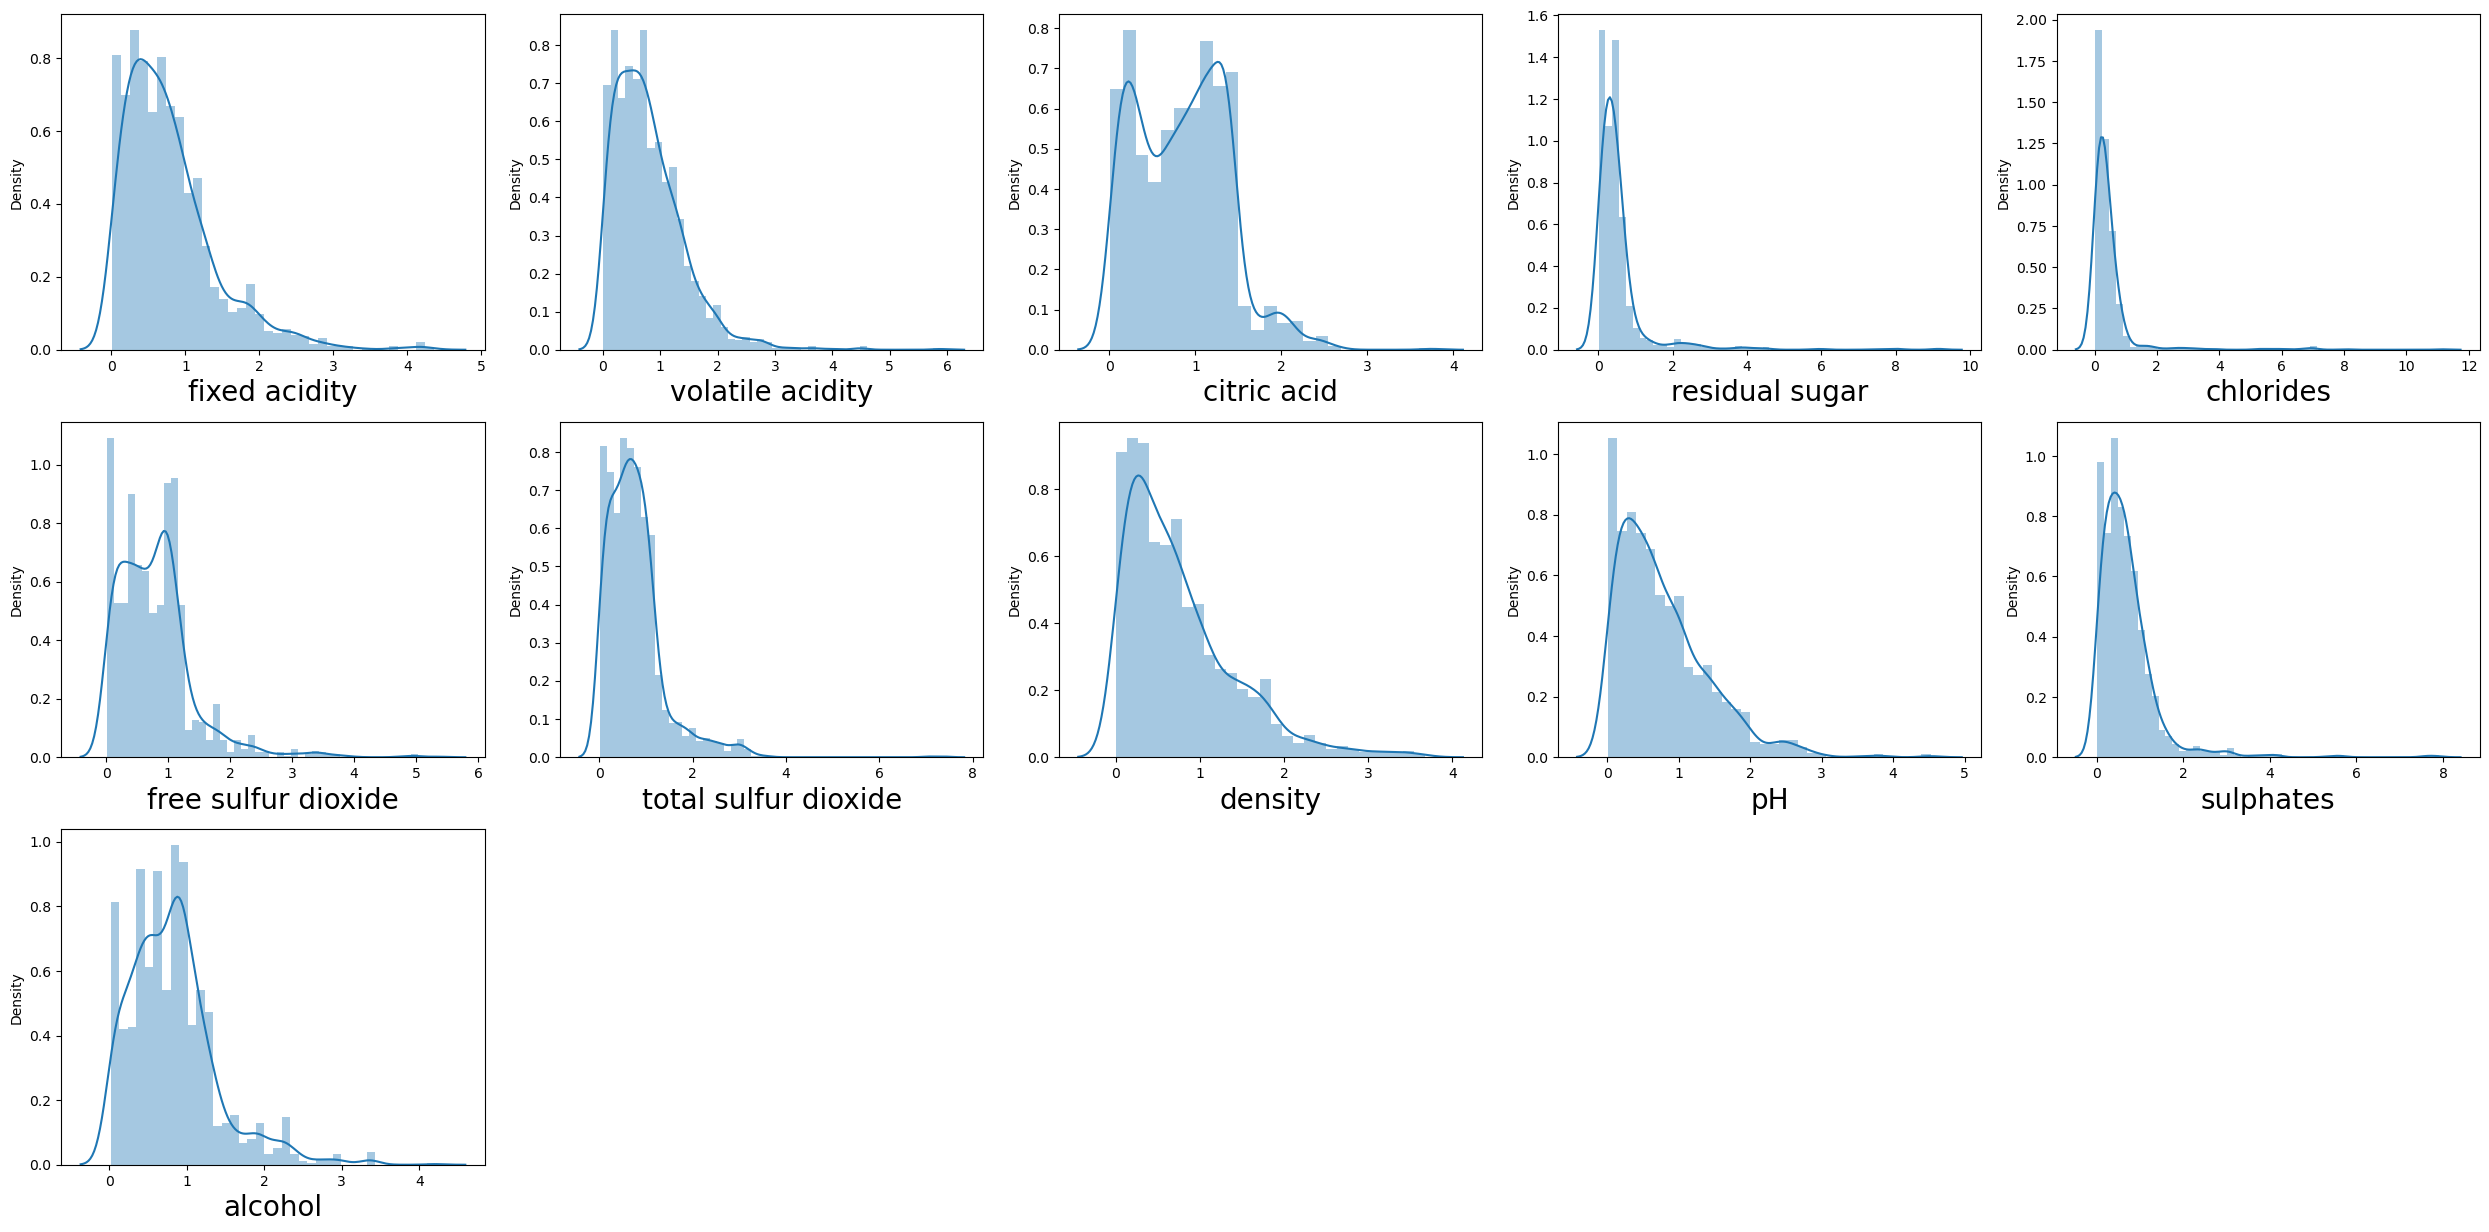

In [104]:
#To know about the distribution 
plt.figure(figsize=(25,20))
plotnumber=1
for column in abs_z_score:
    if plotnumber<=11:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(abs_z_score[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Here we can see that the distribution are better than earlier one.

In [105]:
df1=abs_z_score

In [106]:
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246
1,0.298547,1.967442,1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,0.719933,0.128950,0.584777
2,0.298547,1.297065,1.186070,0.169427,0.096353,0.083669,0.229047,0.134264,0.331177,0.048089,0.584777
3,1.654856,1.384443,1.484154,0.453218,0.264960,0.107592,0.411500,0.664277,0.979104,0.461180,0.584777
4,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.403229,0.980669,0.382271,0.053845,1.542054,0.075043,0.978765,0.899886,0.461180,0.072294
1595,1.390155,0.123905,0.877968,0.240375,0.541259,2.211469,0.137820,0.862162,1.353436,0.601055,0.729364
1596,1.160343,0.099554,0.723916,0.169427,0.243707,1.255161,0.196679,0.533554,0.705508,0.542042,0.541630
1597,1.390155,0.654620,0.775267,0.382271,0.264960,1.542054,0.075043,0.676657,1.677400,0.305990,0.209308


In [110]:
#Splitting the data into features and label
X1=df1
X1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246
1,0.298547,1.967442,1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,0.719933,0.128950,0.584777
2,0.298547,1.297065,1.186070,0.169427,0.096353,0.083669,0.229047,0.134264,0.331177,0.048089,0.584777
3,1.654856,1.384443,1.484154,0.453218,0.264960,0.107592,0.411500,0.664277,0.979104,0.461180,0.584777
4,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.403229,0.980669,0.382271,0.053845,1.542054,0.075043,0.978765,0.899886,0.461180,0.072294
1595,1.390155,0.123905,0.877968,0.240375,0.541259,2.211469,0.137820,0.862162,1.353436,0.601055,0.729364
1596,1.160343,0.099554,0.723916,0.169427,0.243707,1.255161,0.196679,0.533554,0.705508,0.542042,0.541630
1597,1.390155,0.654620,0.775267,0.382271,0.264960,1.542054,0.075043,0.676657,1.677400,0.305990,0.209308


In [111]:
#Marking out the label:
Y1=df["quality"].apply(lambda value: 1 if value>=7 else 0)#depending on the quality value Fixing up the categories into two 0:Bad quality and 1:Good Quality [when quality above 6]
Y1

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [112]:
#To split the data into train and test split
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.2,random_state=2)

In [113]:
#Model-1
#training our model: RANDOM FOREST CLASSIFIER:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)


RandomForestClassifier()

In [114]:
#Testing the model with X_test
x_test_prediction=RFC.predict(x_test)


In [115]:
#Calculating the Accuracy:
accuracy=accuracy_score(x_test_prediction,y_test)

In [116]:
accuracy

0.9125

The Accuracy of the model:
Without treating outliers:91.875%
with treating outliers:91.25%

From this the model without treating the outlier works better.

In [120]:
#End of the project